In [0]:
!pip install -q pyyaml h5py  # Nécessaire pour sauvegarder les modèles au format HDF5

In [0]:
# Importaion des librairies nécessaires

%tensorflow_version 2.x
import tensorflow as tf
import os
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow import keras
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm




In [0]:
#Récupération des fichiers

from google.colab import files
files.upload()

!unzip /content/circuit.zip



In [0]:
#Vérification des images
dir = listdir("/content/circuit")  #Dossier contenant les images

for i in dir:
  print(i)


In [18]:
#Mise en forme des images 

def shape(liste_photos):
  images=[]
  labels=[]
  for i in liste_photos:
    dossier="/content/circuit/"+i
    img= load_img(dossier) #Charge l'image au format PIL
    img = img_to_array(img) #Convertit l'image en tableau numpy
    images.append(img) #On ajoute l'image
    lab= int ((i.split('_')[2]).split('+')[0]) #On récupère la valeur de x correspondant à cette image
    labels.append(lab)
  return images, labels
    
liste_photos = listdir("/content/circuit")
tab_img, tab_lab = shape(liste_photos)
print("lab", tab_lab)
print ("nb images", len(tab_img))


lab [0, 127, 63, 31, 31, 0, 31, 63, 0, 0, 31, 63, 0, 127, 63, 127, 63, 127, 0, 95, 31, 31, 31, 95, 63, 127, 63, 127, 0, 0, 63, 127, 63, 63, 31, 63, 0, 31, 0, 127, 63, 95, 127, 127, 31, 0, 0, 95, 31, 63, 63, 127, 31, 31, 0, 127, 31, 31, 63, 31, 0, 95, 0, 0, 0, 0, 0, 31, 63, 31, 95, 0, 95, 127, 95, 0, 31, 95, 127, 31, 63, 0, 95, 31, 63, 31, 0, 63, 127, 0, 63, 127, 127, 31, 95, 0, 0, 31, 95, 95, 63, 31, 31, 0, 63, 63, 63, 127, 95, 95, 127, 63, 95, 0, 63, 31, 127, 0, 127, 127, 0, 95, 127, 127, 31, 31, 95, 63, 63, 95, 127, 95, 63, 31, 63, 95, 63, 0, 31, 95, 127, 0, 95, 0, 31, 127, 31, 95, 0, 127, 31, 31, 95, 0, 63, 63, 95, 127, 95, 31, 95, 127, 127, 95, 0, 31, 31, 63, 127, 31, 95, 0, 0, 0, 95, 31, 127, 127, 31, 63, 127, 127, 0, 127, 63, 63, 31, 63, 127, 63, 31, 63, 63, 95, 31, 63, 31, 0, 95, 127, 127, 0, 0, 31, 0, 95, 31, 95, 63, 63, 63, 0, 127, 63, 63, 95, 0, 0, 63, 95, 31, 95, 0, 0, 63, 0, 127, 127, 127, 31, 0, 127, 127, 0, 31, 31, 95, 31, 63, 127, 0, 127, 95, 127, 127, 0, 63, 95, 63, 127

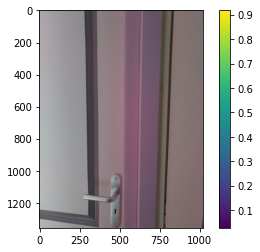

In [19]:
# Pre process des images en modifiant les images 

tab_img=np.array(tab_img)
tab_lab=np.array(tab_lab)

tab_img=tab_img/255.0

#exemple
plt.figure()
plt.imshow(tab_img[0])
plt.colorbar()
plt.grid(False)
plt.show()


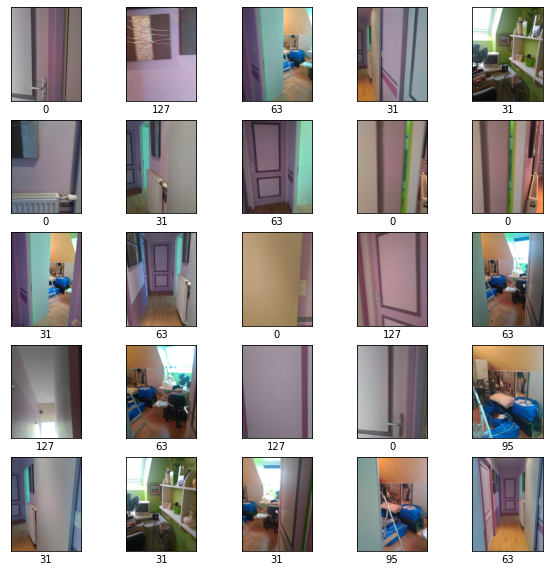

In [20]:
# Vérification des données 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tab_img[i], cmap=plt.cm.binary)
    plt.xlabel(tab_lab[i])
plt.show()

In [0]:
tab_img.shape #Vérifier la dimension des images

(365, 1356, 1017, 3)

In [0]:
# Construction du modèle 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1356,1017,3)), # reformate les données (d'un tableau à 3 dimensions en un tableau à 1 dimension)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128)  # 5 noeuds en sortie ? Puisque 5 directions
])

In [0]:
# Compilation du modèle 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
# Nourrir le modèle 

model.fit(tab_img, tab_lab, batch_size=64, epochs=10)

Epoch 1/10
6/6 [==============================] - 14s 2s/step - loss: 1638.1283 - accuracy: 0.1178
Epoch 2/10
6/6 [==============================] - 14s 2s/step - loss: 1016.0754 - accuracy: 0.3123
Epoch 3/10
6/6 [==============================] - 14s 2s/step - loss: 490.0634 - accuracy: 0.3315
Epoch 4/10
6/6 [==============================] - 14s 2s/step - loss: 371.4960 - accuracy: 0.4192
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 192.3421 - accuracy: 0.5123
Epoch 6/10
6/6 [==============================] - 14s 2s/step - loss: 160.9688 - accuracy: 0.6055
Epoch 7/10
6/6 [==============================] - 14s 2s/step - loss: 196.9757 - accuracy: 0.4685
Epoch 8/10
6/6 [==============================] - 14s 2s/step - loss: 223.3656 - accuracy: 0.6192
Epoch 9/10
6/6 [==============================] - 14s 2s/step - loss: 104.6946 - accuracy: 0.6795
Epoch 10/10
6/6 [==============================] - 14s 2s/step - loss: 56.6644 - accuracy: 0.7260


In [0]:
#Evaluer la précision 

test_loss, test_acc = model.evaluate(tab_img,  tab_lab, verbose=2)

print('\nTest accuracy:', test_acc)

In [0]:
model.save('circuit1.h5')

In [0]:
from google.colab import files
files.download('circuit1.h5')

In [0]:
#Récupération du modèle

from google.colab import files
files.upload()

In [26]:
#Récupération du ciruit correspond à la destination demandée

dossier='/content/'+ 'circuit1.h5'
print(dossier)

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('circuit1.h5')

# Show the model architecture
new_model.summary()

/content/circuit1.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4137156)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               529556096 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
Total params: 529,572,608
Trainable params: 529,572,608
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Importer les images de validation et les pré traiter 

from google.colab import files
files.upload()

!unzip /content/DP_Valid.zip


nb images 149


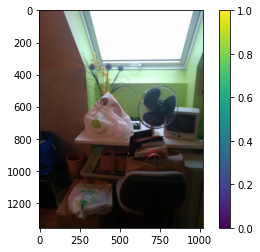

In [28]:
def shape2(liste_photos):
  images=[]
  labels=[]
  for i in liste_photos:
    #print ("i1",i)
    dossier="/content/DP_Valid/"+i
    img= load_img(dossier) #Charge l'image au format PIL
    img = img_to_array(img) #Convertit PIL en Numpy array
    images.append(img) #On ajoute l'image
    lab= int ((i.split('_')[1]).split('+')[0]) #On récupère la valeur de x correspondant à cette image
    labels.append(lab)
  return images, labels
    
liste_photos2 = listdir("/content/DP_Valid")
tab_img_val, tab_lab_val = shape2(liste_photos2)
print ("nb images", len(tab_img_val))

tab_img_val=np.array(tab_img_val)
tab_lab_val=np.array(tab_lab_val)

tab_img_val=tab_img_val/255.0

plt.figure()
plt.imshow(tab_img_val[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
# Prédictions

probability_model = tf.keras.Sequential([new_model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(tab_img_val)


In [0]:
direction={0:"gauche",31:"diagonale gauche",63:"tout droit", 95:"diagonale droite", 127:"droite"}
joy= {0:(0,0), 31:(31,31), 63:(63,127), 95:(95,95), 127:(127,127)}

In [31]:
# Evaluer les prédictions

dir = joy[np.argmax(predictions)]
print(dir)


(31, 31)


In [0]:
# Visualiser les prédictions 

def plot_image(i, predictions_array, true_label, img):
  predictions_array,true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(direction[predicted_label],
                                100*np.max(predictions_array),
                                direction[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

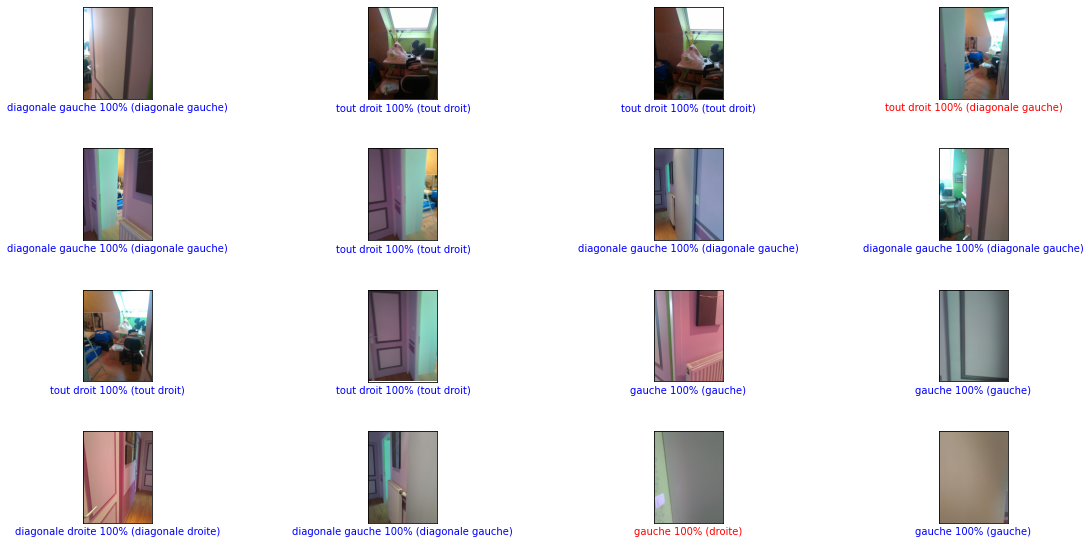

In [33]:

# Affiche l'image, la prédiciton et le vrai label
# Bonnes prédictions en bleu et mauvaises prédictions en rouge
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], tab_lab_val, tab_img_val)
plt.tight_layout()
plt.show()